<a href="https://colab.research.google.com/github/Isabel-Su/Wave-Simulator/blob/main/Copy_of_5_30_25_APC_Wave_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5/30 Version of Wave Simulator

using a triangular initial position of string. fixed/updated animations to better display data since I'm tracking energy now too (matplotlib stuff is chatgpt code).

## Some Findings
* the more I increase step_size, the higher energy is (makes sense bc each spring is more stressed)
* pulse radius at 5 created a wave that split into 2 (each at around half initial height) going in diff directions. @ endpoints they reversed (also fliped to be in negatives) & then eventually rejoined, resplit, etc etc
* pulse radius at 3 has same effect, but later on, a subwave next to the waves are created. there's also a bunch of little tiny waves btwn the 2 waves.
* the energy graph from these tiny waves form consistent 'standing' waves
* unlike prev version where a single point mass was plucked, in this version the point masses don't go directly into the negatives
* the speed of the wave is not dependent on amplitude/peak height

## Importing Libraries

In [ ]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from IPython.display import HTML


## Set Initial Conditions

In [ ]:
N = 100  # num of blocks
k = 100.0  # spr const
m = 1.0  # mass of each block
dt = .01  # time step
energy_scale = 15


In [ ]:
# trackers / data
y = np.zeros(N)
v = np.zeros(N)
a = np.zeros(N)
W = np.zeros(N)

# settings for initial pulse
pulse_radius = 3 # approximate. true pulse radius is (pulse_radius + .5)
peak_ht = .1
pulse_location = 5 # cannot be within [pulse radius] of end points

step_size = peak_ht / pulse_radius # i.e. slope

# setting up initial positions

for i in range(pulse_radius):
  y[pulse_location + i] = peak_ht - i * step_size
  y[pulse_location - i] = peak_ht - i * step_size

# print(y)

## Updater Function

In [ ]:
def step():
  global y, v, W, A
  a_f = np.zeros(N)
  for i in range(1, N-1):  # fixed boundaries
    a_f[i] = (k / m) * (y[i-1] + y[i+1] - 2 * y[i])  # plug into general formula
    # print(y[i])
  v += a_f * dt  # algebraic integration (for now?)
  y += v * dt # dy = v * dt
  W = a_f * m * v * dt # W = P * dt
  a = a_f

## Animation

In [ ]:
def animate(frame):
  step()
  wave.set_ydata(y)
  energy.set_ydata(W * energy_scale) # scaled up energy graph to see changes better
  return wave, energy

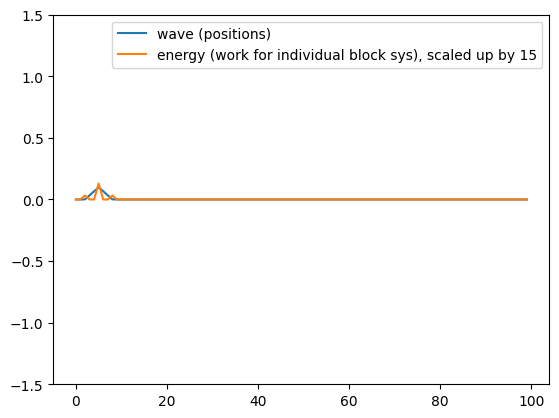

In [ ]:
fig, ax = plt.subplots()
wave, = ax.plot(range(N), y, label='wave (positions)')
energy, = ax.plot(range(N), W, label=f'energy (work for individual block sys), scaled up by {energy_scale}')
ax.legend()
ax.set_ylim(-1.5, 1.5)


ani = FuncAnimation(fig, animate, frames=200, interval=30, blit=True)
plt.show()
HTML(ani.to_jshtml())

testing stuff below